In [7]:
import pandas as pd

df = pd.read_csv("data/owid-co2-data.csv")

print(df.shape)
df.head()


(50411, 79)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
cols = [
    'country',
    'year',
    'co2',
    'co2_per_capita',
    'energy_per_capita',
    'population',
    'gdp'
]

df = df[cols]
df.head()


,country,year,co2,co2_per_capita,energy_per_capita,population,gdp
0,Afghanistan,1750,NaN,NaN,NaN,2802560.0,NaN
1,Afghanistan,1751,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df[df['country'].str.len() < 20]


In [20]:
print(df.shape)
df.head()


(44855, 7)


,country,year,co2,co2_per_capita,energy_per_capita,population,gdp
0,Afghanistan,1750,NaN,NaN,NaN,2802560.0,NaN
1,Afghanistan,1751,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,NaN,NaN,NaN,NaN,NaN


In [21]:
df = df.dropna(subset=['co2'])


In [22]:
print(df.shape)
df.head()


(26181, 7)


,country,year,co2,co2_per_capita,energy_per_capita,population,gdp
199,Afghanistan,1949,0.015,0.002,NaN,7356890.0,NaN
200,Afghanistan,1950,0.084,0.011,NaN,7776180.0,9.421400e+09
201,Afghanistan,1951,0.092,0.012,NaN,7879343.0,9.692280e+09
202,Afghanistan,1952,0.092,0.011,NaN,7987784.0,1.001732e+10
203,Afghanistan,1953,0.106,0.013,NaN,8096703.0,1.063052e+10


In [23]:
df.to_csv("data/clean_climate_data.csv", index=False)
print("Cleaned dataset saved successfully")


Cleaned dataset saved successfully


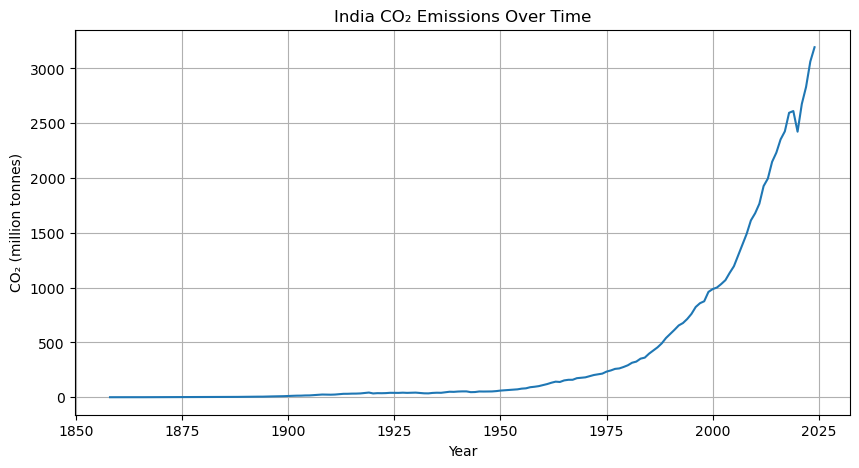

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/india_year.csv")

plt.figure(figsize=(10,5))
plt.plot(df["year"], df["co2"])
plt.title("India CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ (million tonnes)")
plt.grid(True)
plt.show()


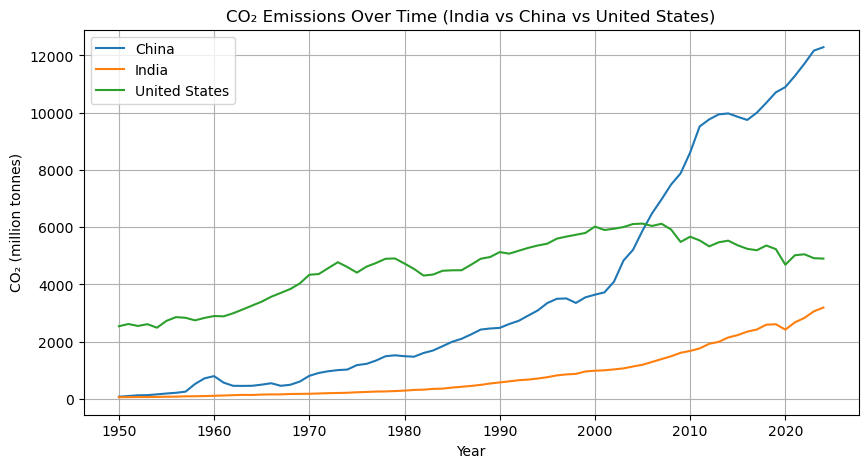

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/country_comparison.csv")

plt.figure(figsize=(10,5))

for c in df['country'].unique():
    temp = df[df['country'] == c]
    plt.plot(temp['year'], temp['co2'], label=c)

plt.title("CO₂ Emissions Over Time (India vs China vs United States)")
plt.xlabel("Year")
plt.ylabel("CO₂ (million tonnes)")
plt.legend()
plt.grid(True)
plt.show()


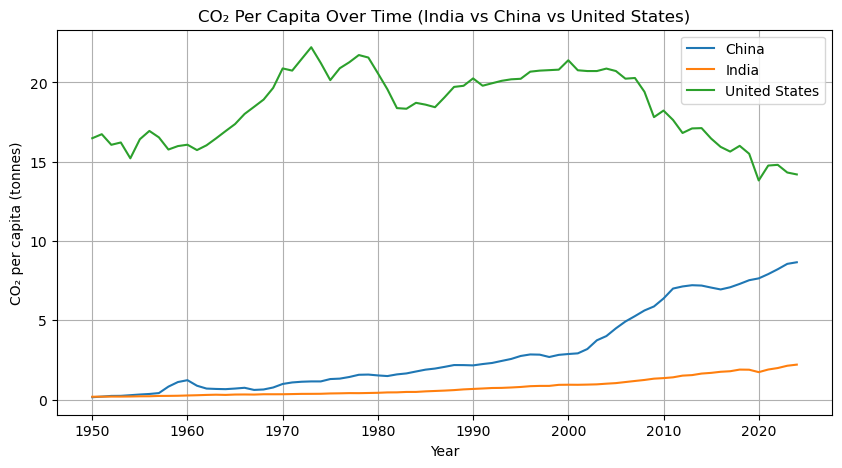

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/co2_per_capita.csv")

plt.figure(figsize=(10,5))

for c in df['country'].unique():
    temp = df[df['country'] == c]
    plt.plot(temp['year'], temp['co2_per_capita'], label=c)

plt.title("CO₂ Per Capita Over Time (India vs China vs United States)")
plt.xlabel("Year")
plt.ylabel("CO₂ per capita (tonnes)")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/gdp_co2.csv")
df.head()


,country,year,gdp,co2
0,China,1990,3.385122e+12,2483.534
1,China,1991,3.508948e+12,2619.143
2,China,1992,3.755038e+12,2731.290
3,China,1993,4.126169e+12,2914.284
4,China,1994,4.438753e+12,3093.891


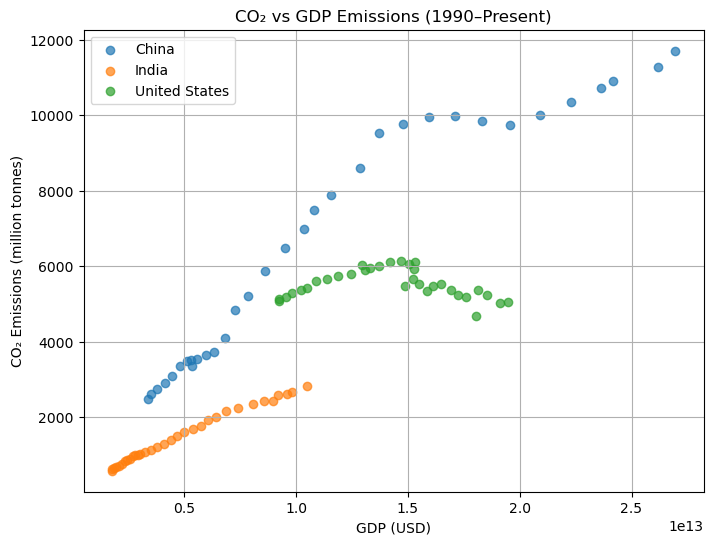

In [23]:
plt.figure(figsize=(8,6))

colors = {'India':'orange', 'China':'blue', 'United States':'green'}

for c in df['country'].unique():
    temp = df[df['country'] == c]
    plt.scatter(temp['gdp'], temp['co2'], label=c, alpha=0.7)

plt.title("CO₂ vs GDP Emissions (1990–Present)")
plt.xlabel("GDP (USD)")
plt.ylabel("CO₂ Emissions (million tonnes)")

plt.legend()
plt.grid(True)
plt.show()
